In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from win32cryptcon import szOID_KP_DOCUMENT_SIGNING

In [46]:
df = pd.read_csv('../../DATA/gene_expression.csv')

In [47]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


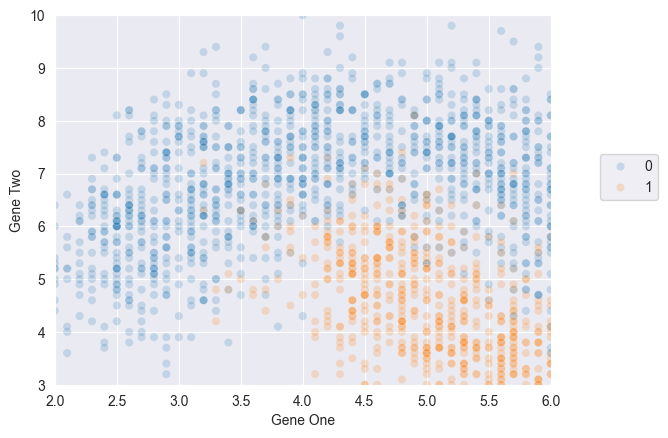

In [48]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.2)
plt.xlim(2, 6)
plt.ylim(3, 10)
plt.legend(loc=(1.1, 0.5))

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [51]:
X, y = df.drop('Cancer Present', axis=1), df['Cancer Present']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
scaler = StandardScaler()

In [54]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [55]:
scaled_X_train

array([[-1.17991479,  0.22605766],
       [ 0.34466362, -2.00644235],
       [-1.23436402,  1.02746792],
       ...,
       [ 1.4336482 , -1.49125004],
       [ 0.50801131, -0.46086542],
       [ 1.65144511, -0.63259619]])

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [58]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [59]:
full_test = pd.concat([X_test, y_test], axis=1)

In [60]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

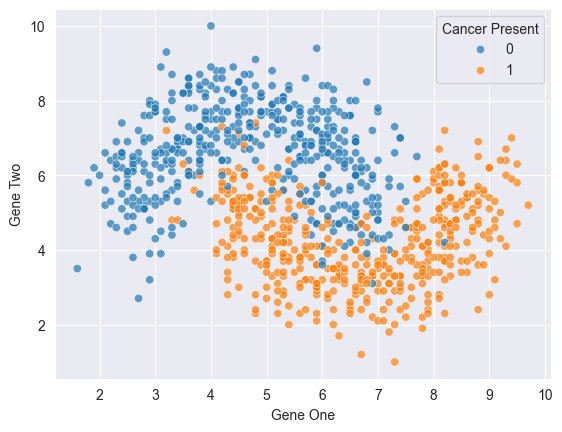

In [61]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)

In [62]:
y_pred = knn_model.predict(scaled_X_test)

In [63]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
accuracy_score(y_test, y_pred)

0.93

In [67]:
confusion_matrix(y_test, y_pred)

array([[412,  36],
       [ 27, 425]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       448
           1       0.92      0.94      0.93       452

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [74]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [79]:
list(enumerate(test_error_rates, start=1))

[(1, 0.09999999999999998),
 (2, 0.09666666666666668),
 (3, 0.08999999999999997),
 (4, 0.07444444444444442),
 (5, 0.06999999999999995),
 (6, 0.07111111111111112),
 (7, 0.06777777777777783),
 (8, 0.06777777777777783),
 (9, 0.06555555555555559),
 (10, 0.06444444444444442),
 (11, 0.06333333333333335),
 (12, 0.06222222222222218),
 (13, 0.06222222222222218),
 (14, 0.061111111111111116),
 (15, 0.06555555555555559),
 (16, 0.06444444444444442),
 (17, 0.06444444444444442),
 (18, 0.06444444444444442),
 (19, 0.06444444444444442),
 (20, 0.06222222222222218),
 (21, 0.06777777777777783),
 (22, 0.061111111111111116),
 (23, 0.06333333333333335),
 (24, 0.06222222222222218),
 (25, 0.06333333333333335),
 (26, 0.061111111111111116),
 (27, 0.06333333333333335),
 (28, 0.06333333333333335),
 (29, 0.06333333333333335)]

Text(0.5, 0, 'K Value')

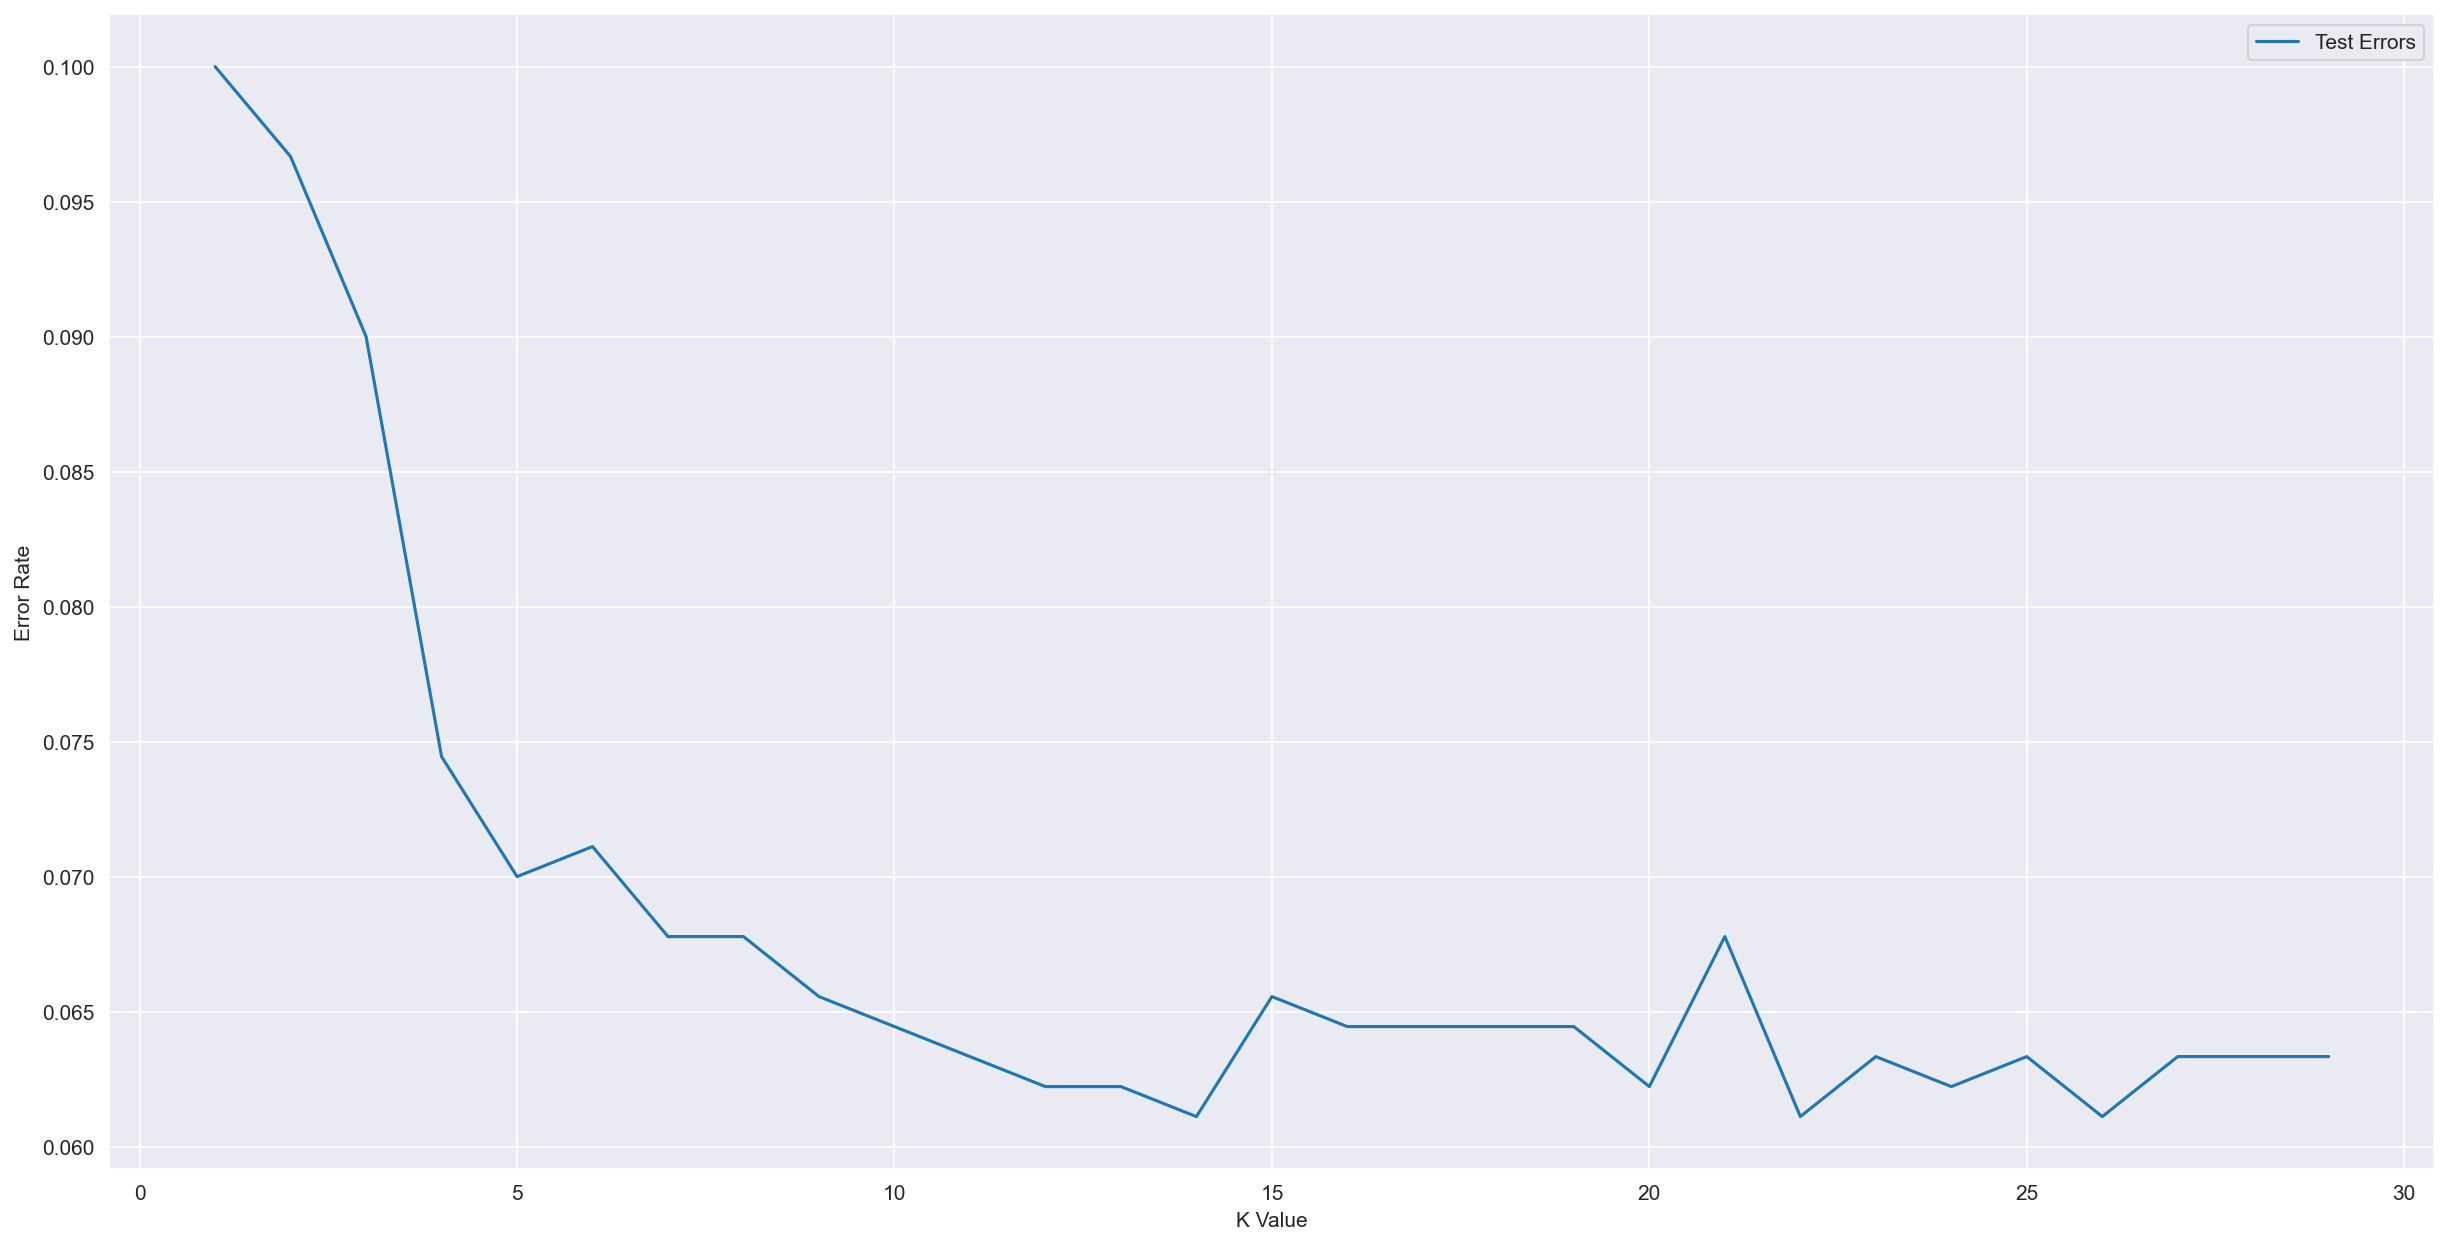

In [72]:
plt.figure(figsize=(20, 10), dpi=150)
plt.plot(range(1, 30), test_error_rates, label='Test Errors')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier()

In [88]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [89]:
operations = [('scaler', scaler), ('knn', knn)]

In [90]:
from sklearn.pipeline import Pipeline

In [95]:
pipe = Pipeline(operations)

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
k_values = list(range(1, 30))

In [94]:
param_grid = {'knn__n_neighbors': k_values}

In [98]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [100]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [102]:
full_cv_classifier.best_estimator_.get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [103]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [104]:
len(k_values)

29